# Crime In Boston

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred.

## What types of crimes are most common?
## Where are different types of crimes most likely to occur? 
## Does the frequency of crimes change over the day? Week? Year?

## 1)Importing Data and Some Data Cleaning 

#### Import Library

In [65]:
import math
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore", category=UserWarning)

#### Import the data

In [3]:
df = pd.read_csv("crime.csv")


#### find the missing value

In [4]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

#### Delete the column shooting

In [5]:
del df['SHOOTING']

#### Summary of the data 

In [6]:
df.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


#### head

In [7]:
df.head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


#### head of the columns containing missing values

In [8]:
df[df.columns[df.isnull().any()]].head(20)


,DISTRICT,UCR_PART,STREET,Lat,Long
0,D14,Part One,LINCOLN ST,42.357791,-71.139371
1,C11,Part Two,HECLA ST,42.306821,-71.060300
2,D4,Part Three,CAZENOVE ST,42.346589,-71.072429
3,D4,Part Three,NEWCOMB ST,42.334182,-71.078664
4,B3,Part Three,DELHI ST,42.275365,-71.090361
5,C11,Part Three,TALBOT AVE,42.290196,-71.071590
6,B2,Part One,NORMANDY ST,42.306072,-71.082733
7,B2,Part Three,LAWN ST,42.327016,-71.105551
8,C6,Part One,MASSACHUSETTS AVE,42.331521,-71.070853
9,C11,Part Three,LESLIE ST,42.295147,-71.058608


#### Head of all columns

In [9]:
df.head(20)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)"
7,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,2018-09-03 20:39:37,2018,9,Monday,20,Part Three,LAWN ST,42.327016,-71.105551,"(42.32701648, -71.10555088)"
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)"
9,I182070929,3301,Verbal Disputes,VERBAL DISPUTE,C11,364,2018-09-03 20:38:00,2018,9,Monday,20,Part Three,LESLIE ST,42.295147,-71.058608,"(42.29514664, -71.05860832)"


#### Deleting all the missing values 

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

#### shape of the data after deleting the missing value 

In [11]:
df.shape

(296573, 16)

## 2)Analysing the Data

#### The type of crime existing in Boston

<AxesSubplot:>

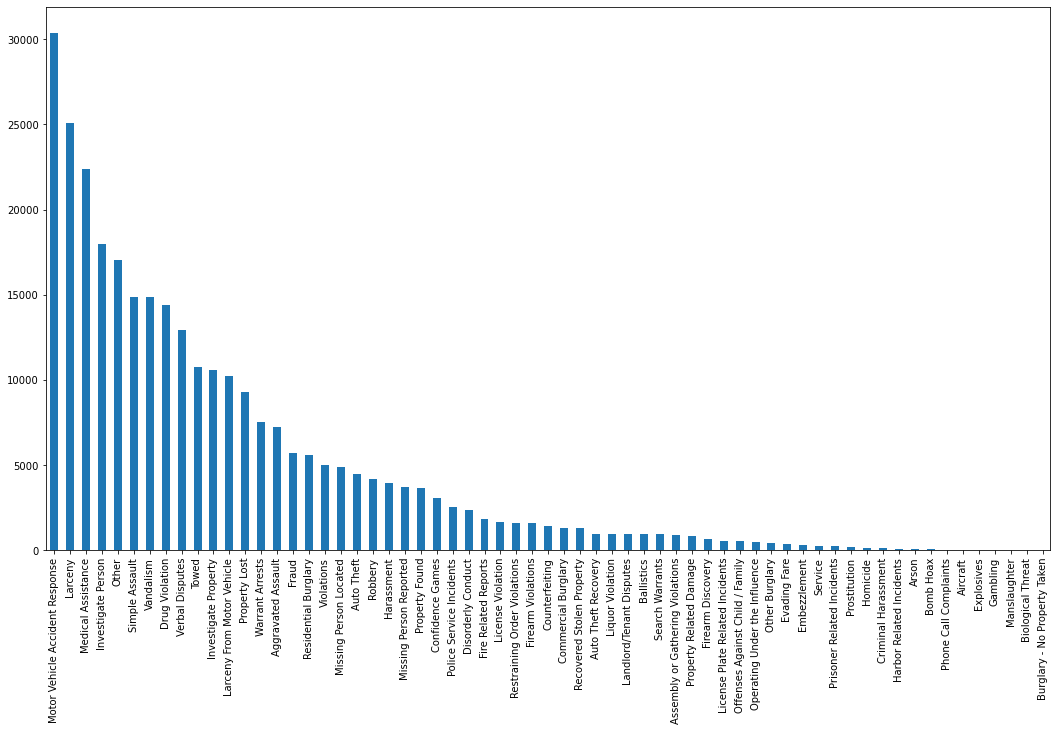

In [12]:
##for x,y in zip(df["OFFENSE_CODE_GROUP"].value_counts().index,df["OFFENSE_CODE_GROUP"].value_counts()):
 #     print(x,":",y)
df["OFFENSE_CODE_GROUP"].value_counts().plot(kind="bar", figsize=(18, 10))

<AxesSubplot:ylabel='OFFENSE_CODE_GROUP'>

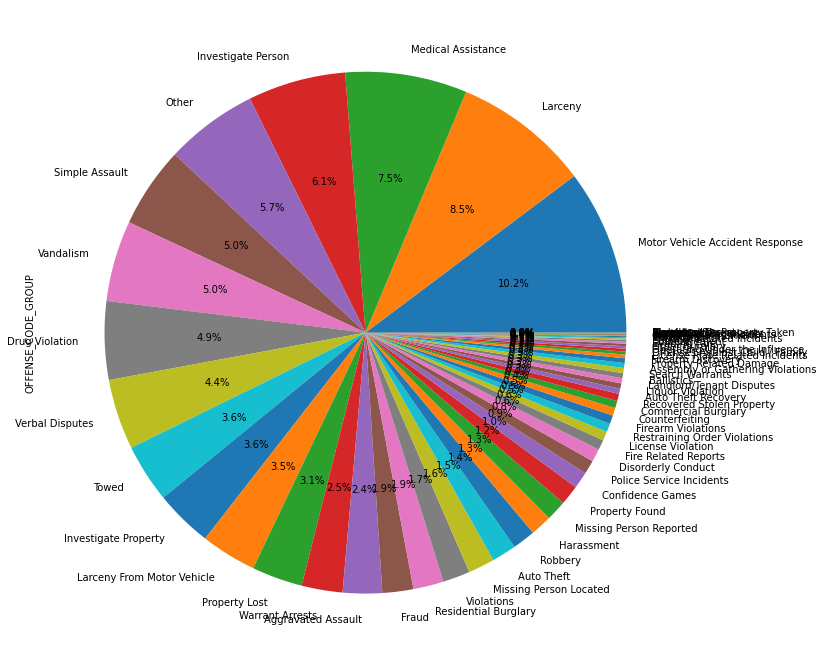

In [13]:
df["OFFENSE_CODE_GROUP"].value_counts().plot(kind="pie", figsize=(22, 12), autopct='%1.1f%%')

#### Analysing the crime per district

<AxesSubplot:ylabel='DISTRICT'>

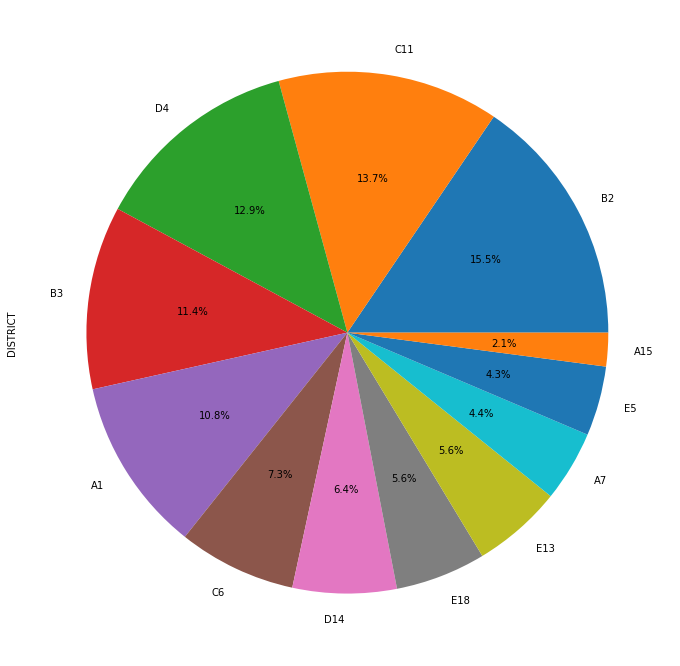

In [14]:
df["DISTRICT"].value_counts().plot(kind="pie", figsize=(22, 12), autopct='%1.1f%%')

##### Barchart that represent the visualization of the most common crime in each district

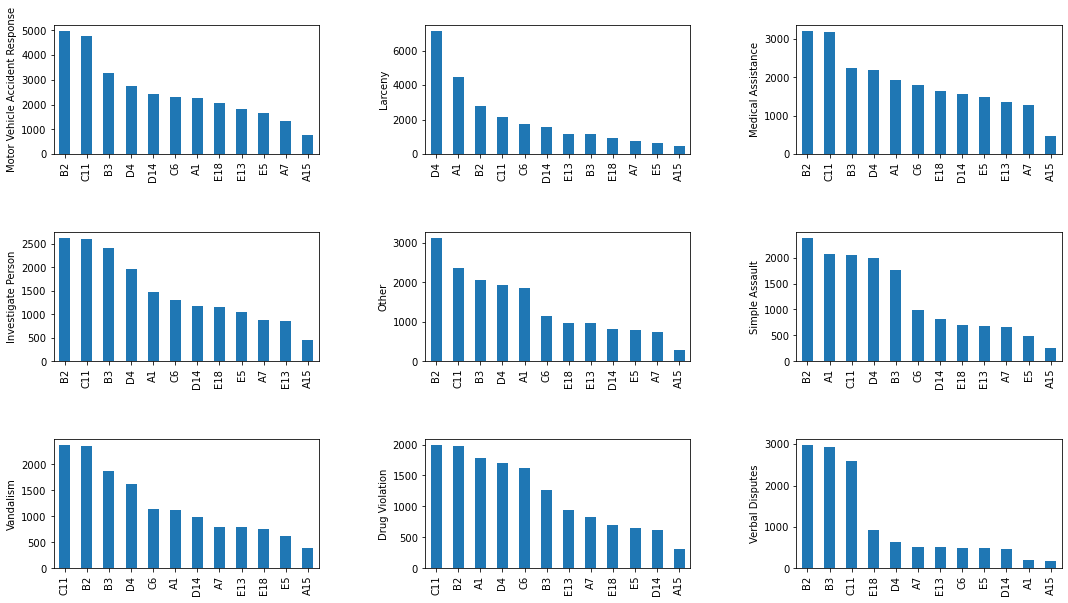

In [15]:
cat = [df["OFFENSE_CODE_GROUP"].value_counts().index[x] for x in range(9)]
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for var, subplot in zip(cat, ax.flatten()):
    df[df["OFFENSE_CODE_GROUP"]==var]["DISTRICT"].value_counts().plot(kind="bar",ax=subplot)
    subplot.set_ylabel(var)
fig.subplots_adjust(left=0.2, wspace=0.4, hspace = 0.6)

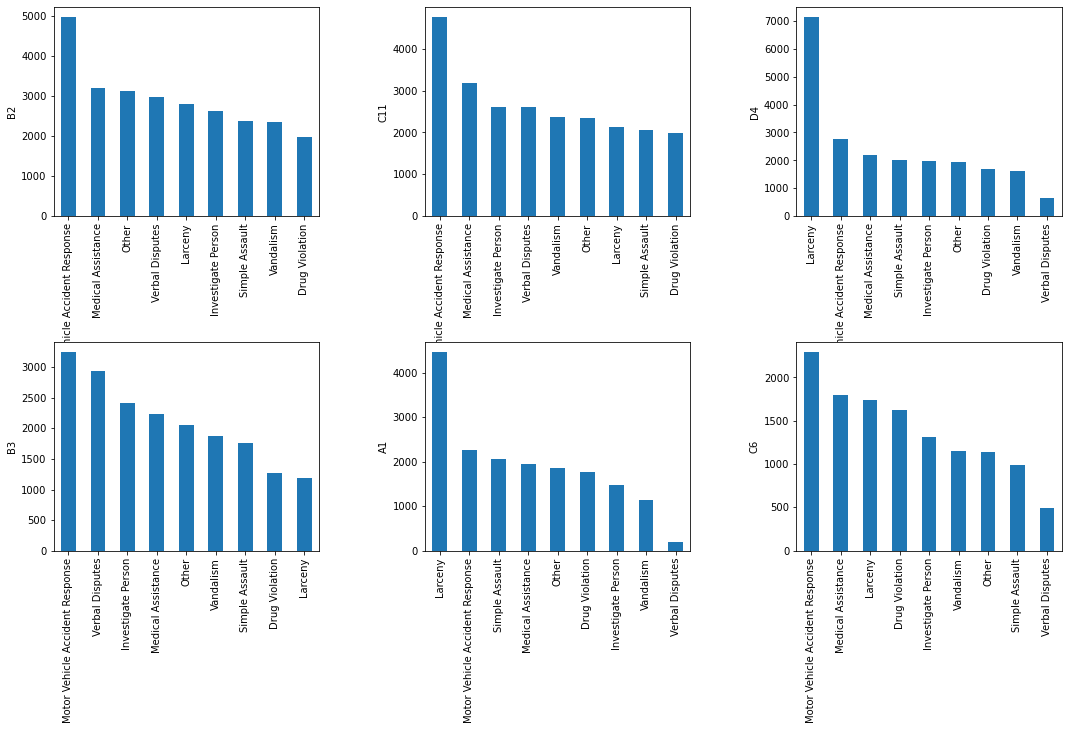

In [16]:
cat1 = [df["DISTRICT"].value_counts().index[x] for x in range(12)]
r = pd.DataFrame()
r["OFFENSE_CODE_GROUP"],r["DISTRICT"],cat =  df["OFFENSE_CODE_GROUP"],df["DISTRICT"],[df["OFFENSE_CODE_GROUP"].value_counts().index[x] for x in range(9,63)]
for x in cat:
    r.drop(r[r["OFFENSE_CODE_GROUP"]==x].index,inplace=True)
cat11,cat12 = cat1[:len(cat1)//2],cat1[len(cat1)//2:]

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for var, subplot in zip(cat11, ax.flatten()):
    r[r["DISTRICT"]==var]["OFFENSE_CODE_GROUP"].value_counts().plot(kind="bar",ax=subplot)
    subplot.set_ylabel(var)
fig.subplots_adjust(left=0.2, wspace=0.4, hspace = 0.6)

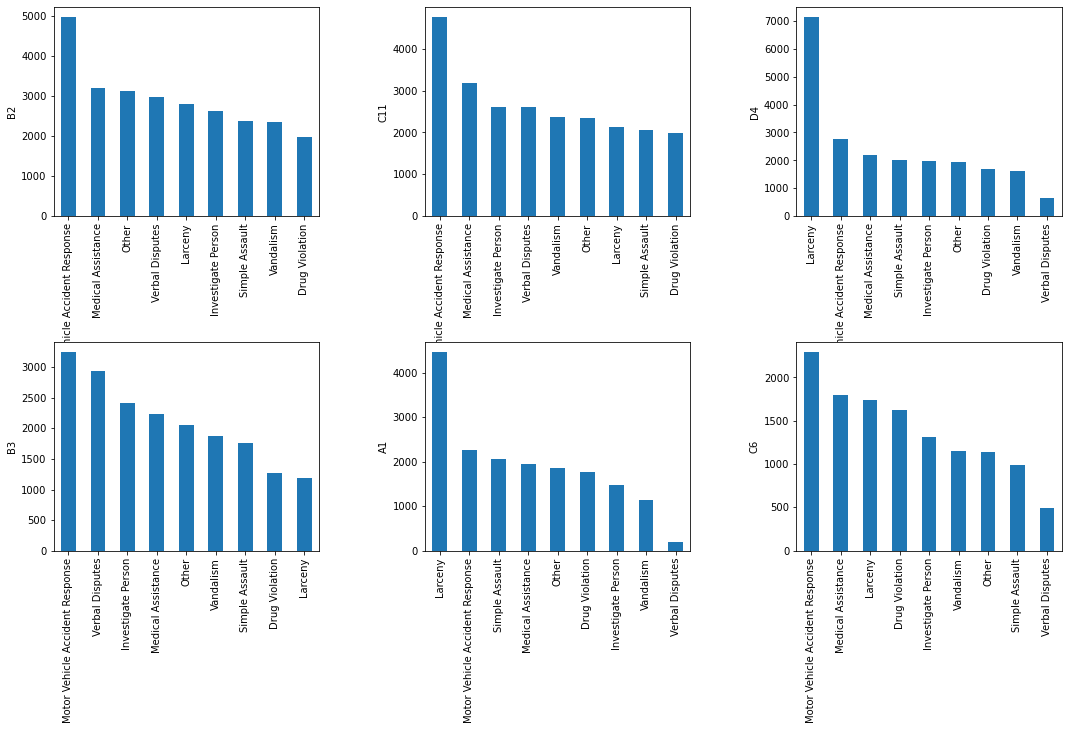

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for var, subplot in zip(cat11, ax.flatten()):
    r[r["DISTRICT"]==var]["OFFENSE_CODE_GROUP"].value_counts().plot(kind="bar",ax=subplot)
    subplot.set_ylabel(var)
fig.subplots_adjust(left=0.2, wspace=0.4, hspace = 0.6)

## 3)Time Serie Analysis

##### Create the pivot table

In [18]:
r["OCCURRED_ON_DATE"] = df["OCCURRED_ON_DATE"]
r["OCCURRED_ON_DATE"]=[x[:10] for x in r["OCCURRED_ON_DATE"]]
r["OCCURRED_ON_DATE"]=pd.to_datetime(pd.Series(r["OCCURRED_ON_DATE"]))
r["count"] = [1 for x in r["OCCURRED_ON_DATE"]]
res = r.pivot_table(index="OCCURRED_ON_DATE",columns="OFFENSE_CODE_GROUP",values="count",aggfunc='sum')

##### convert the pivot table to dataframe

In [19]:
res.dropna(inplace=True)
res = pd.DataFrame(res.to_records())

##### Indexing with Time Series Data

In [20]:
f = res.set_index('OCCURRED_ON_DATE')
f.index

DatetimeIndex(['2015-06-15', '2015-06-16', '2015-06-17', '2015-06-18',
               '2015-06-19', '2015-06-20', '2015-06-22', '2015-06-23',
               '2015-06-24', '2015-06-25',
               ...
               '2018-08-24', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03'],
              dtype='datetime64[ns]', name='OCCURRED_ON_DATE', length=1166, freq=None)

In [21]:
cat3 = f.columns
cat31,cat32,cat33 = cat3[:3],cat3[3:6],cat3[6:]

In [22]:
f.columns

Index(['Drug Violation', 'Investigate Person', 'Larceny', 'Medical Assistance',
       'Motor Vehicle Accident Response', 'Other', 'Simple Assault',
       'Vandalism', 'Verbal Disputes'],
      dtype='object')

##### Drug violation, Investigate person, Larceny

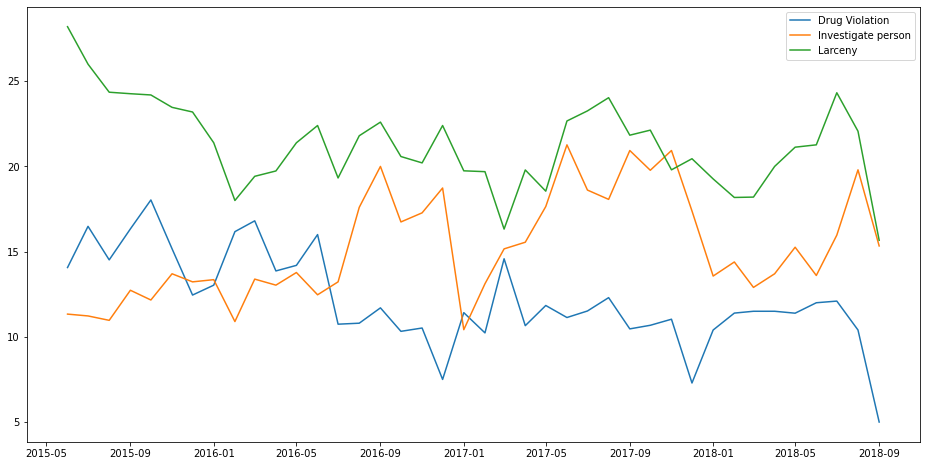

In [23]:
y = []
for x in cat31:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(16,8))
plt.plot(y[0],label = "Drug Violation")
plt.plot(y[1],label="Investigate person")
plt.plot(y[2],label="Larceny")
plt.legend()

##### Medical Assistance, Motor Vehicle Accident Response

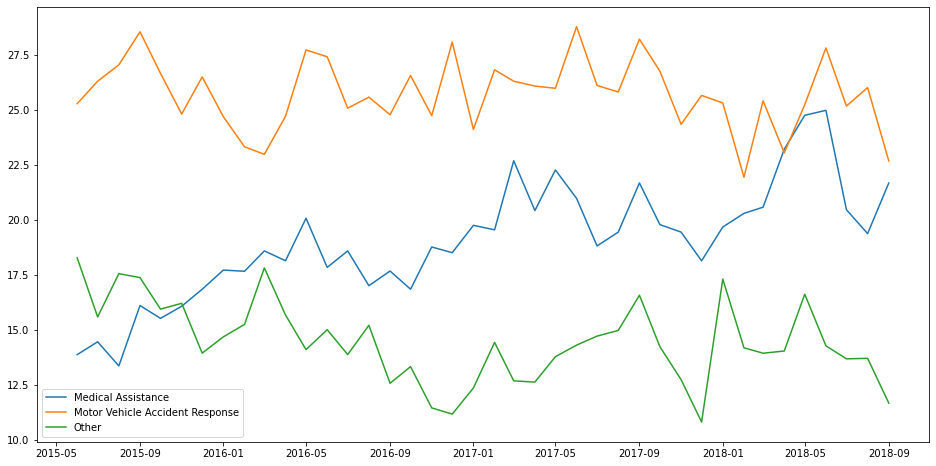

In [24]:
y = []
for x in cat32:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(16,8))
plt.plot(y[0],label ="Medical Assistance")
plt.plot(y[1],label="Motor Vehicle Accident Response")
plt.plot(y[2],label="Other")
plt.legend()

##### Simple Assault, Vandalism, Verbal Disputes

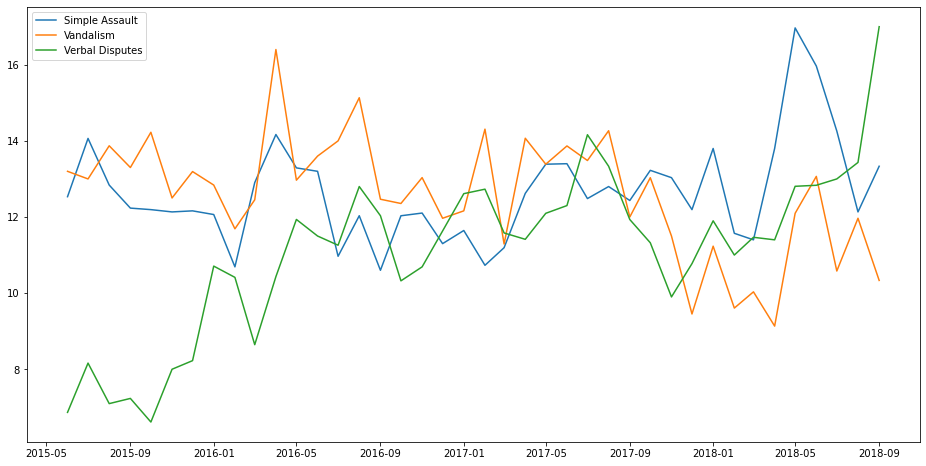

In [25]:
y = []
for x in cat33:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(16,8))
plt.plot(y[0],label ="Simple Assault")
plt.plot(y[1],label="Vandalism")
plt.plot(y[2],label="Verbal Disputes")
plt.legend()

plt.show()

##### All in one

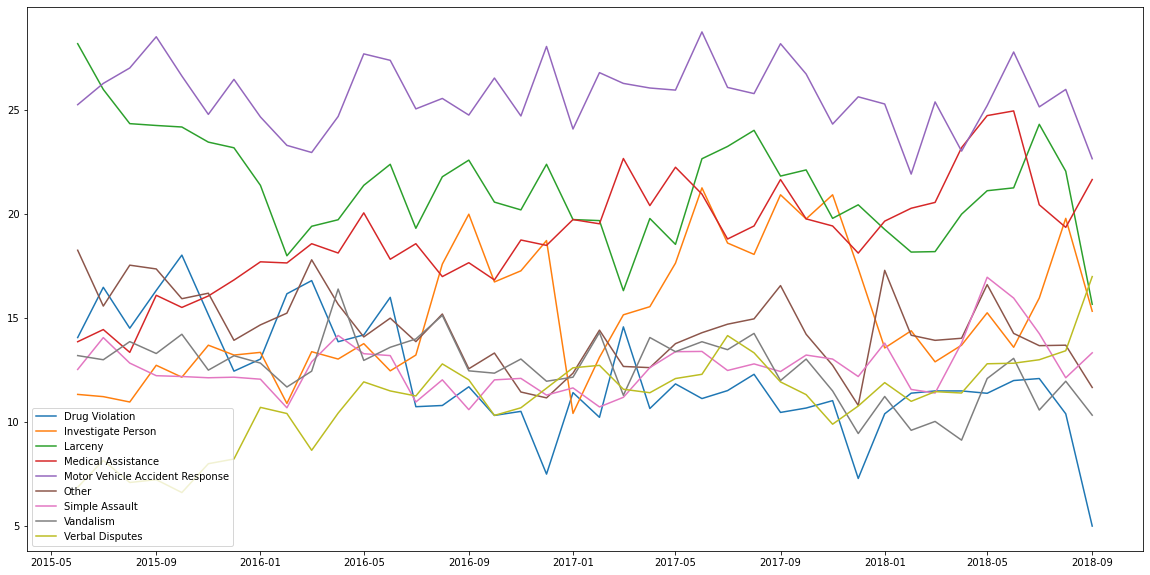

In [26]:
y = []
for x in cat3:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(20,10))
for x,y in zip(y,f.columns):
    plt.plot(x,label =y)
plt.legend()
plt.show()


### Analysing the crimes in boston over the years in each district

In [27]:
res1 = r.pivot_table(index="OCCURRED_ON_DATE",columns="DISTRICT",values="count",aggfunc='sum')
res1.dropna(inplace=True)
res1 = pd.DataFrame(res1.to_records())
f = res1.set_index('OCCURRED_ON_DATE')
f.index
cat3 = f.columns
cat31,cat32,cat33,cat34 = cat3[:3],cat3[3:6],cat3[6:9],cat3[9:12]

##### A1, A15 and A7

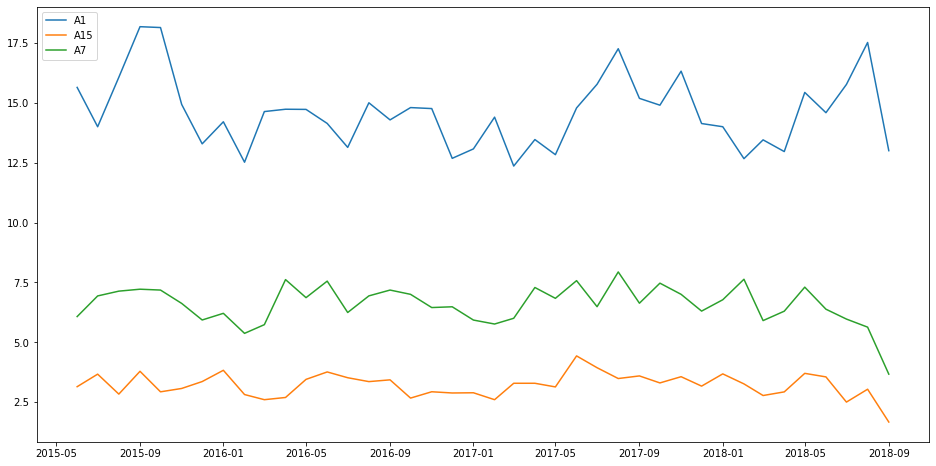

In [28]:
y = []
for x in cat31:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(16,8))
for x,y in zip(y,range(3)):
    plt.plot(x,label =f.columns[y])
plt.legend()
plt.show()


##### B2, B3 and C11

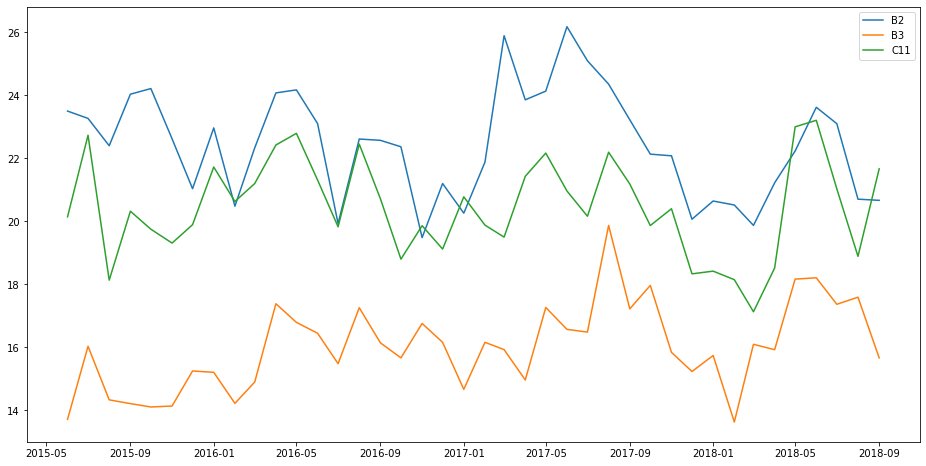

In [29]:
y = []
for x in cat32:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(16,8))
for x,y in zip(y,range(3,6)):
    plt.plot(x,label =f.columns[y])
plt.legend()
plt.show()

##### C6, D14 and D4

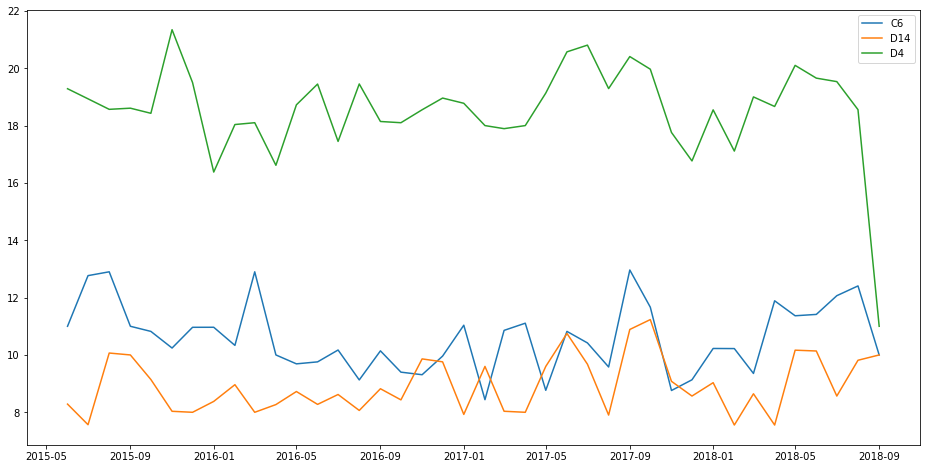

In [30]:
y = []
for x in cat33:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(16,8))
for x,y in zip(y,range(6,9)):
    plt.plot(x,label =f.columns[y])
plt.legend()
plt.show()

##### E13, E18 and E5

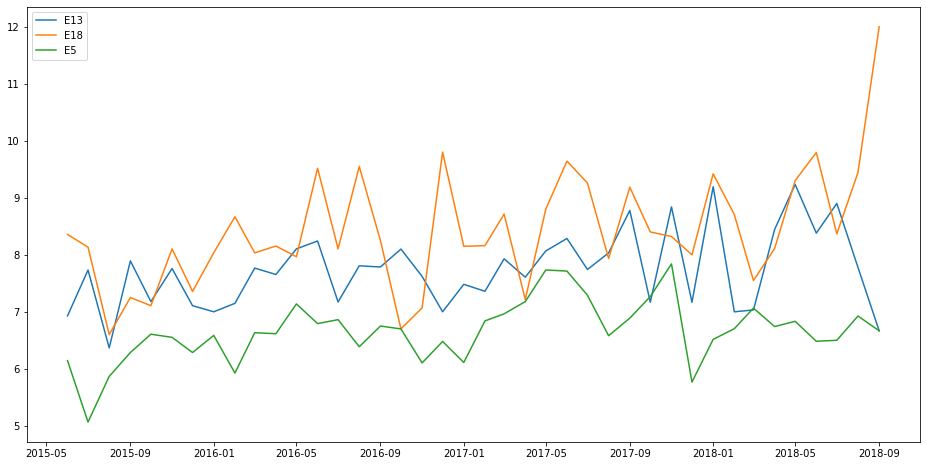

In [31]:
y = []
for x in cat34:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(16,8))
for x,y in zip(y,range(9,12)):
    plt.plot(x,label =f.columns[y])
plt.legend()
plt.show()

##### All in one

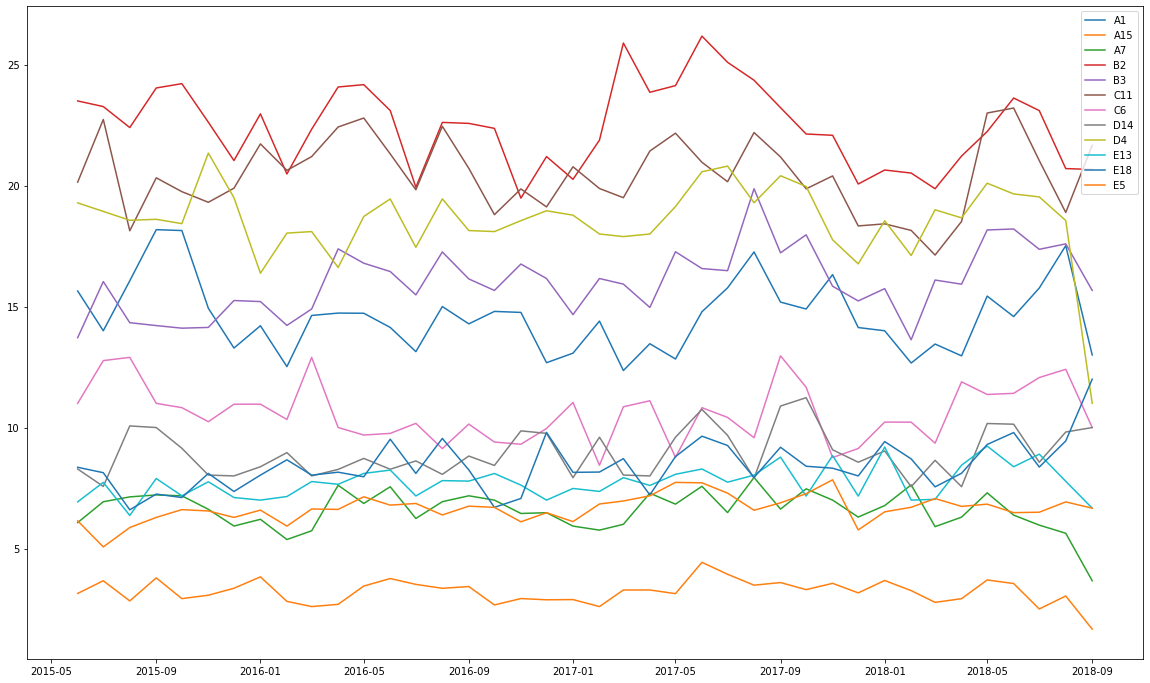

In [32]:
y = []
for x in cat3:
    y.append(f[x].resample('MS').mean())
plt.figure(figsize=(20,12))
for x,y in zip(y,f.columns):
    plt.plot(x,label =y)
plt.legend()
plt.show()

In [33]:
df["date"] = [x[0:10] for x in df["OCCURRED_ON_DATE"]]
df["date"]

0         2018-09-02
1         2018-08-21
2         2018-09-03
3         2018-09-03
4         2018-09-03
             ...    
319068    2016-06-05
319069    2015-07-09
319070    2015-07-09
319071    2016-05-31
319072    2015-06-22
Name: date, Length: 296573, dtype: object

In [34]:
d = (pd.to_datetime(df['date'])
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count'))
d.sort_values(by=['date'])


,date,count
815,2015-06-15,239
753,2015-06-16,242
981,2015-06-17,225
162,2015-06-18,284
246,2015-06-19,276
...,...,...
781,2018-08-30,241
561,2018-08-31,255
715,2018-09-01,244
1096,2018-09-02,205


In [37]:
type(d["date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [47]:
r = d.sort_values(by=['date'])["count"]
print(type(r))
r = r.values.astype("float32")
print(type(r))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


## 4)Time series forecasting using LSTM

#### Plot dataset

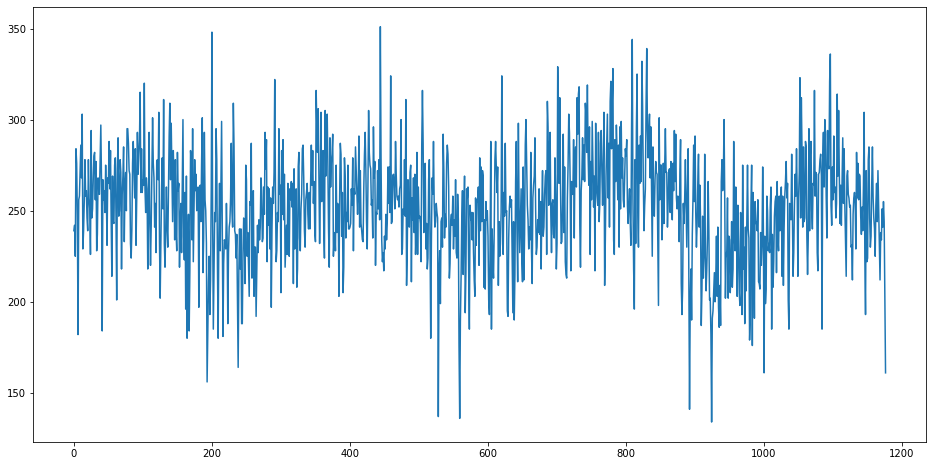

In [48]:
plt.figure(figsize=(16,8))
plt.plot(r)
plt.show()

#### Normalize the data

In [51]:
r = [[x] for x in r]
scaler = MinMaxScaler(feature_range=(0, 1))
r = scaler.fit_transform(r)

#### Split train/test data

In [53]:
train_size = int(len(r) * 0.67)
test_size = len(r) - train_size
train, test = r[0:train_size,:], r[train_size:len(r),:]
print(len(train), len(test))

788 389


#### convert an array of values into a dataset matrix

In [54]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

#### reshape into X=t and Y=t+1


In [55]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#### reshape input to be [samples, time steps, features]

In [58]:
print(trainX[0])
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX[0])

[0.48387097]
[[0.48387097]]


#### Create and compile LSTM model

In [59]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#### Model Summary

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


#### Fit the model

In [61]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
786/786 - 2s - loss: 0.0417
Epoch 2/100
786/786 - 0s - loss: 0.0173
Epoch 3/100
786/786 - 0s - loss: 0.0173
Epoch 4/100
786/786 - 0s - loss: 0.0173
Epoch 5/100
786/786 - 0s - loss: 0.0173
Epoch 6/100
786/786 - 0s - loss: 0.0173
Epoch 7/100
786/786 - 0s - loss: 0.0173
Epoch 8/100
786/786 - 0s - loss: 0.0173
Epoch 9/100
786/786 - 0s - loss: 0.0170
Epoch 10/100
786/786 - 0s - loss: 0.0172
Epoch 11/100
786/786 - 0s - loss: 0.0172
Epoch 12/100
786/786 - 0s - loss: 0.0171
Epoch 13/100
786/786 - 0s - loss: 0.0173
Epoch 14/100
786/786 - 1s - loss: 0.0171
Epoch 15/100
786/786 - 1s - loss: 0.0173
Epoch 16/100
786/786 - 1s - loss: 0.0173
Epoch 17/100
786/786 - 1s - loss: 0.0173
Epoch 18/100
786/786 - 1s - loss: 0.0173
Epoch 19/100
786/786 - 1s - loss: 0.0173
Epoch 20/100
786/786 - 1s - loss: 0.0172
Epoch 21/100
786/786 - 0s - loss: 0.0173
Epoch 22/100
786/786 - 0s - loss: 0.0172
Epoch 23/100
786/786 - 1s - loss: 0.0172
Epoch 24/100
786/786 - 0s - loss: 0.0173
Epoch 25/100
786/786 - 1s

#### making predictions

In [62]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#### invert predictions

In [63]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

#### calculate root mean squared error

In [66]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 28.44 RMSE
Test Score: 30.26 RMSE


#### shift train predictions for plotting

In [69]:
trainPredictPlot = np.empty_like(r)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

#### shift test predictions for plotting

In [70]:
testPredictPlot = np.empty_like(r)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(r)-1, :] = testPredict

#### plot baseline and predictions


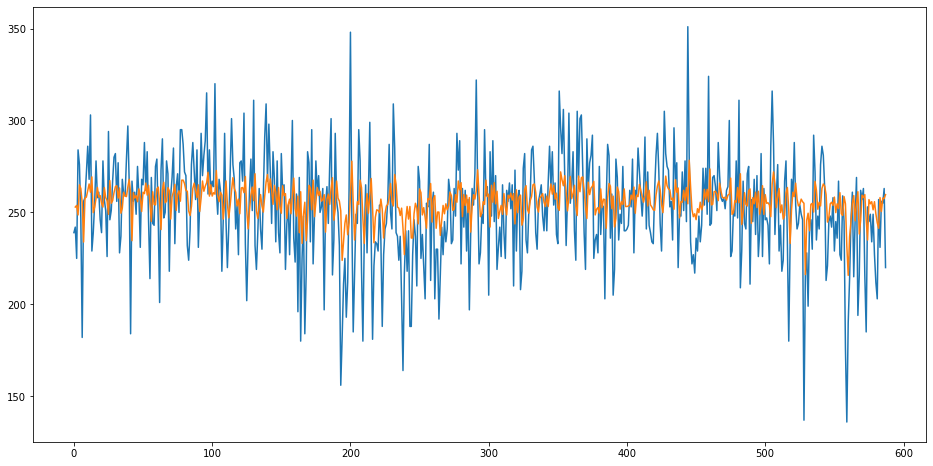

In [97]:
n = len(r)
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(r[:int(n/2)]))
plt.plot(trainPredictPlot[:int(n/2)])
plt.plot(testPredictPlot[:int(n/2)])
plt.show()

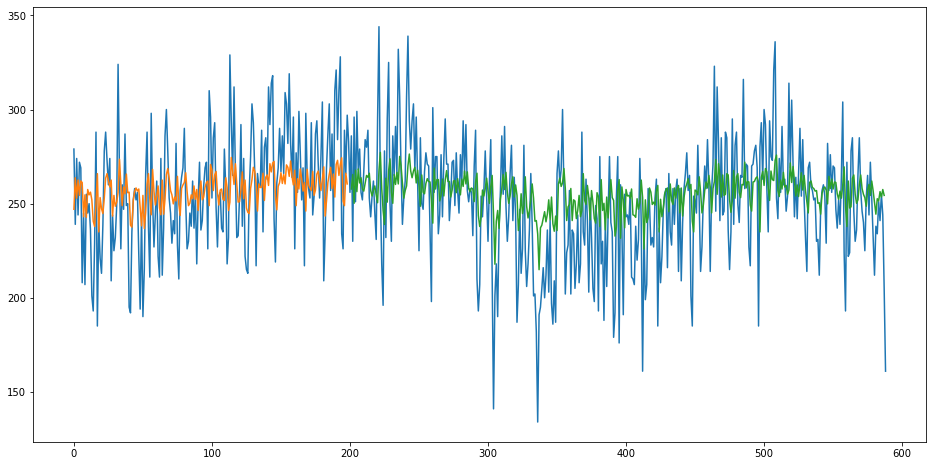

In [98]:
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(r[int(n/2):]))
plt.plot(trainPredictPlot[int(n/2):])
plt.plot(testPredictPlot[int(n/2):])
plt.show()

## 5)Conclusion

1) 
Obviously, the 9 most common type of crimes in boston are :
Motor Vehicle Accident Response  
Larceny  
Medical assistance  
Investigate person  
Other  
Simple Assault  
Vandalism  
Drug Violation  
Verbal Disputes  
these crimes account for more than 50% of boston crimes  
 
2)   
64.3% of the crime in boston occur in the Districts [B2,C11,D4,B3,A1], 
so we can conclude that these district are where the most bostom crimes took place, 
Also, the barcharts tells us that most of the crimes in Boston took place
in district B2 and C11 except for the thefts that appear most in district D4 and A1

3) 
We notice that the Larency rate in Boston reaches its maximum between June and August and decrease gradually over the years.  
that is the summer, while the rate of drug-violation decreases remarkably at the end of each years.  
About the investigate person crime, the rate peaks in summer and increase progressively over the years.

Motor-vehicle-Accident increase in the end of the spring and decrease at the end of each years.  
Medical-Assistance increase progressively over the years and for some reason,
this crime increase exponentially and reaches its peak in June 2018.

Verbal-Disputes rate increase gradually over the year and reach its peak in the middle of the years.  
Simple-assault rate has not changed much but for some reason increase exponentially 
in march 2018 until it reaches its maximum in may and decrease as fast as it peaks.  
Vandalism rate peak and valley gradually until he stats decreasing in august 2017.

The last plot of time-series analysis represent the distribution of all the crime's frequency  
in boston,  we can not deny the fact that the majority of the crimes decrease progressively  
over the year except for (Investigate-person, Medical Assistance, Verbal Disputes).  

So to answer our question, according to our observation the frequency of crimes change over the days, months and years.
 
